## Lib Import

In [ ]:
#import necessary library

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
!pip install pythainlp
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 13.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 13.8 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=a63ffb1a8f46775ad866dd61ae00983bb541cea7ae060ba4b3af4459dfa02fe8
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [ ]:
import emoji
from pythainlp import word_tokenize, Tokenizer
from pythainlp.corpus.common import thai_stopwords
from pythainlp.corpus.common import thai_words

## Function

In [ ]:
def cm_plot(cm):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.coolwarm)
    classNames = ['Negative', 'Positive']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    plt.grid(None)
    plt.rcParams.update({'font.size': 10})
    plt.rcParams["font.weight"] = "bold"
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [ ]:
def n_grams(text_tokens, n=2):
    word1 = text_tokens.split(' ')
    text_v2 = ','.join(w for w in word1)
    for i in range(n):
        if i == 0:
            continue
        for w in range(len(word1)-(i)):
            text_v = word1[w]
            for k in range(i):   
                text_v = text_v + ' ' + word1[w+k+1]
            text_v2 = text_v2 + ',' + text_v
    return text_v2

# Benchmark

In [ ]:
# import file
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/df2021_cleaned.csv')
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/df2019_cleaned.csv')

In [ ]:
df_all = pd.concat([df2021, df2019])
df_pos = df_all[df_all['sentiment'] == 'pos'].copy()
df_neg = df_all[df_all['sentiment'] == 'neg'].copy()

### neg

In [ ]:
emoji_english = emoji.UNICODE_EMOJI['en']
emoji_list = [key for key in emoji_english.keys()]

custom_words_list = set(thai_words())

custom_words_list.update(emoji_list)

custom_tokenizer = Tokenizer(custom_dict=custom_words_list, engine='newmm')

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df_neg['text_tokens'] = df_neg['text'].apply(text_process)
df_neg['text_tokens'].values

TypeError: ignored

In [ ]:
df_neg['text_tokens'] = df_neg['text'].apply(text_process)
df_neg['text_tokens'].values

In [ ]:
neg_word_all = " ".join(text for text in df_neg ['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/DS-project/THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=50, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)

In [ ]:
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
wordcount_df_neg = count_word(df_neg)
with pd.option_context('display.max_rows', None):
    display(wordcount_df_neg) #แทน None

### pos

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df_pos['text_tokens'] = df_pos['text'].apply(text_process)
df_pos['text_tokens'].values

In [ ]:
pos_word_all = " ".join(text for text in df_pos ['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = '/content/drive/MyDrive/DS-project/THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=50, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)

In [ ]:
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df_all['text_tokens'] = df_all['text'].apply(text_process)
df_all['text_tokens']

In [ ]:
df_all['n_grams'] = df_all['text_tokens'].apply(n_grams, n=2)
df_all['n_grams'].values

In [ ]:
def count_word(df):
    word_all = " ".join(text for text in df['text_tokens'])
    word_list = word_all.split(" ")
    word_dict = dict()
    for w in word_list:
        if w in thai_stopwords:
            word_dict[w] = 0
        if w in word_dict.keys():
            word_dict[w] = word_dict[w] + 1
        else:
            word_dict[w] = 1

    word_count = pd.DataFrame.from_dict(word_dict, orient='index')
    word_count.reset_index(inplace=True)
    word_count.set_axis(['word', 'count'], axis=1, inplace=True)
    word_count.sort_values(by='count', ascending=False, inplace=True)
    
    return word_count

In [ ]:
wordcount_df = count_word(df_all)

In [ ]:
with pd.option_context('display.max_rows', None):
    display(wordcount_df) #แทน None

# Preprocessing

## balanced dataset

In [ ]:
# import file
df2021 = pd.read_csv('/content/drive/MyDrive/DS-project/df2021_cleaned.csv')
df2019 = pd.read_csv('/content/drive/MyDrive/DS-project/df2019_cleaned.csv')

In [ ]:
df2021_pos = df2021[df2021['sentiment'] == 'pos']
df2021_neg = df2021[df2021['sentiment'] == 'neg']
df2019_pos = df2019[df2019['sentiment'] == 'pos']
df2019_neg = df2019[df2019['sentiment'] == 'neg']
print('positive tweets count in 2021 : {}'.format(df2021_pos.shape[0]))
print('negative tweets count in 2021 : {}'.format(df2021_neg.shape[0]))
print('positive tweets count in 2019 : {}'.format(df2019_pos.shape[0]))
print('negative tweets count in 2019 : {}'.format(df2019_neg.shape[0]))

positive tweets count in 2021 : 80
negative tweets count in 2021 : 1324
positive tweets count in 2019 : 459
negative tweets count in 2019 : 2136


In [ ]:
df2021_neg_rand = df2021_neg.sample(n=df2021_pos.shape[0], random_state = 123)
df2019_neg_rand = df2019_neg.sample(n=df2019_pos.shape[0], random_state = 123)

In [ ]:
df2021_bal = pd.concat([df2021_pos, df2021_neg_rand])
df2019_bal = pd.concat([df2019_pos, df2019_neg_rand])

In [ ]:
df = pd.concat([df2021_bal, df2019_bal])
df.shape[0]

1078

## stop word

In [ ]:
thai_stopwords = list(thai_stopwords())
len(thai_stopwords)

1030

In [ ]:
stopword_2019 = pd.read_csv('/content/drive/MyDrive/DS-project/stopword_2019.csv')
stopword_2021 = pd.read_csv('/content/drive/MyDrive/DS-project/stopword_2021.csv')

In [ ]:
list_stop_word_2019 = stopword_2019['word'].values
list_stop_word_2021 = stopword_2021['word'].values

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = set(thai_stopwords())
thai_stopwords.update(list_stop_word_2019)
thai_stopwords.update(list_stop_word_2021)
len(thai_stopwords)

5848

In [ ]:
thai_stopwords.update(list_stop_word_2019)

In [ ]:
thai_stopwords.remove('ไม่')
thai_stopwords.remove('ปาก')
thai_stopwords.remove('ขยับ')
thai_stopwords.remove('พบ')
thai_stopwords.remove('มา')
thai_stopwords.remove('เคย')

# **Model**

## Naive (Rule-Based)

In [ ]:
def naive_pred(df, axis):
  if df['col'].contains('รอ'):
    return 1
  else: return 0

In [ ]:
df['naive_prediction'] = np.where(df['text'].str.contains("รอ|หาย|😭|เหี้ย|อี|แย่"), 'neg', 'pos')

In [ ]:
pos_prop = df[df['naive_prediction']=='pos'].shape[0]/df.shape[0]
neg_prop = df[df['naive_prediction']=='neg'].shape[0]/df.shape[0]

In [ ]:
print(f'Positive naive prediction : {(pos_prop)*100:.2f}%')
print(f'Negative naive prediction : {(neg_prop)*100:.2f}%')

In [ ]:
with pd.option_context('display.max_rows', None):
    display(df[df['naive_prediction']==1]) #แทน None

In [ ]:
df.shape[0]

In [ ]:
X = df['naive_prediction']
y = df[['sentiment', 'naive_prediction']]

In [ ]:
X_train_naive, X_test_naive, Y_train_naive, Y_test_naive = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
naive_accuracy_score = (accuracy_score(Y_test_naive['sentiment'], Y_test_naive['naive_prediction']))

In [ ]:
len(Y_test_naive)

In [ ]:
((Y_test_naive['sentiment'] == 'neg') & (Y_test_naive['naive_prediction'] == 'neg')).sum()

In [ ]:
(((Y_test_naive['sentiment'] == 'pos') & (Y_test_naive['naive_prediction'] == 'pos')).sum() + ((Y_test_naive['sentiment'] == 'neg') & (Y_test_naive['naive_prediction'] == 'neg')).sum()) / len(Y_test_naive)

In [ ]:
print(f'Accuracy Score : {(naive_accuracy_score)*100:.2f}%')

In [ ]:
print(classification_report(Y_test_naive['sentiment'], Y_test_naive['naive_prediction']))

In [ ]:
MSE(Y_test_naive['sentiment'].map({'pos':1, 'neg':0}), Y_test_naive['naive_prediction'].map({'pos':1, 'neg':0}))

In [ ]:
conf_m_0 = confusion_matrix(Y_test_naive['sentiment'], Y_test_naive['naive_prediction'])
cm_plot(conf_m_0)
accuracy_model0 = accuracy_score(Y_test_naive['sentiment'], Y_test_naive['naive_prediction'])
precision_model0 = conf_m_0[1][1] / (conf_m_0[0][1] + conf_m_0[1][1])
recall_model0 = conf_m_0[1][1] / (conf_m_0[1][0] + conf_m_0[1][1])

In [ ]:
accuracy_CV0 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV0 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV0 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')

## 1st Pipeline : Cleaned  + ngram_range = 1 (Logistic Regression)

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens'].values

array(['มา หา น่ารัก',
       'ปัด ความรับผิดชอบ เลวร้าย ชื่อเสียง ดี ไม่ แย่ ไม่ ตี ระวัง แตก ไม่ มา ไม่',
       'EMS กรุงเทพ หลัก พังงา ไม่ หลัก 🥰', ..., 'โมโห ไม่ อี',
       'อห ไม่ จังหวัด EMS', 'ค้าง นครราชสีมา กังวล กังวล ค้าง รบกวน'],
      dtype=object)

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=1)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow1 = cvec.transform(X_train['n_grams'])
test_bow1 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow1.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#ลทบ,(*'▽'*),E,EMS,Ems,T-T,TT,ToT,centerone,...,🤬,🤬🤬,🤬🤬🤬🤬,🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬🤬,🤭,🤯🤯🤯,🥰,🥲,🥳,🥺🥺🥺#
n_grams,,,,,,,,,,,,,,,,,,,,,
"เสียเงิน,EMS,รับผิด",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"เคย,มา,ดีมาก,เหอะ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ชอบ,สามเสน,ยุ่ง,ไม่,มา,มา",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ปรับปรุง,ปรับปรุง,โง่,รำคาญ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"เคย,มา,น่ารัก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ห่วยแตก,เหมือนเดิม,ems,ไม่,มา,อิด,เขต,อ่อนนุช,หู,ไม่,หี,แตด",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ไม่,สะดวก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_unigram = LogisticRegression()
lr_cleaned_unigram.fit(train_bow1, y_train)

LogisticRegression()

In [ ]:
conf_m_1 = confusion_matrix(test_predictions1, y_test)
cm_plot(conf_m_1)
accuracy_model1 = accuracy_score(test_predictions1, y_test)
precision_model1 = conf_m_1[1][1] / (conf_m_1[0][1] + conf_m_1[1][1])
recall_model1 = conf_m_1[1][1] / (conf_m_1[1][0] + conf_m_1[1][1])
print('\nPrecision Model 1 : {:.2f}%'.format(precision_model1*100))
print('Recall Model 1 : {:.2f}%'.format(recall_model1*100))

In [ ]:
accuracy_test1 = accuracy_score(test_predictions1, y_test)
print('Accuracy Model 1 : {:.2f}%'.format(accuracy_test1*100))

In [ ]:
accuracy_CV1 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='accuracy')
recall_CV1 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='recall')
precision_CV1 = cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='precision')
print('----- Model 1 -----')
print('CV_accuracy : {:.2f}%'.format(accuracy_CV1.mean()*100))
print('CV_precision : {:.2f}%'.format(precision_CV1.mean()*100))
print('CV_recall : {:.2f}%'.format(recall_CV1.mean()*100))

In [ ]:
train_predictions1 = lr_cleaned_unigram.predict(train_bow1)
train_predictions1 = np.where(train_predictions1 == 'pos', 1, 0)
test_predictions1 = np.where(test_predictions1 == 'pos', 1, 0)
logLoss_CV1 = - cross_val_score(lr_cleaned_unigram, train_bow1, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logLoss_1_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions1)
logLoss_1_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions1)
print('--- Log Loss (Model1) ---')
print('CV Log Loss: {:.2f}'.format(logLoss_CV1.mean()))
print('Train Log Loss: {:.2f}'.format(logLoss_1_train))
print('Test Log Loss: {:.2f}'.format(logLoss_1_test))

## 2nd Pipeline : Cleaned + ngram_range = (1,2) (Logistic Regression)

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=2)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow2 = cvec.transform(X_train['n_grams'])
test_bow2 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow2.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_bigram = LogisticRegression()
lr_cleaned_bigram.fit(train_bow2, y_train)

In [ ]:
test_predictions2 = lr_cleaned_bigram.predict(test_bow2)
print(classification_report(test_predictions2, y_test))

In [ ]:
conf_m_2 = confusion_matrix(test_predictions2, y_test)
cm_plot(conf_m_2)
accuracy_model2 = accuracy_score(test_predictions2, y_test)
precision_model2 = conf_m_2[1][1] / (conf_m_2[0][1] + conf_m_2[1][1])
recall_model2 = conf_m_2[1][1] / (conf_m_2[1][0] + conf_m_2[1][1])
print('\nPrecision Model 2 : {:.2f}%'.format(precision_model2*100))
print('Recall Model 2 : {:.2f}%'.format(recall_model2*100))

In [ ]:
accuracy_CV2 = cross_val_score(lr_cleaned_bigram, train_bow2, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV2 = cross_val_score(lr_cleaned_bigram, train_bow2, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV2 = cross_val_score(lr_cleaned_bigram, train_bow2, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 2 -----')
print('CV_accuracy : {:.2f}%'.format(accuracy_CV2.mean()*100))
print('CV_precision : {:.2f}%'.format(precision_CV2.mean()*100))
print('CV_recall : {:.2f}%'.format(recall_CV2.mean()*100))

In [ ]:
train_predictions2 = lr_cleaned_bigram.predict(train_bow2)
train_predictions2 = np.where(train_predictions2 == 'pos', 1, 0)
test_predictions2 = np.where(test_predictions2 == 'pos', 1, 0)
logLoss_CV2 = - cross_val_score(lr_cleaned_bigram, train_bow2, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logLoss_2_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions2)
logLoss_2_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions2)
print('--- Log Loss (Model2) ---')
print('CV Log Loss: {:.2f}'.format(logLoss_CV2.mean()))
print('Train Log Loss: {:.2f}'.format(logLoss_2_train))
print('Test Log Loss: {:.2f}'.format(logLoss_2_test))

## 3th Pipeline : Cleaned + Emoji + ngram_range = 1 (Logistic Regression)

In [ ]:
emoji_english = emoji.UNICODE_EMOJI['en']
emoji_list = [key for key in emoji_english.keys()]

custom_words_list = set(thai_words())

custom_words_list.update(emoji_list)

custom_tokenizer = Tokenizer(custom_dict=custom_words_list, engine='newmm')

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens']

0                                            มา หา น่ารัก
11      ปัด ความรับผิดชอบ เลวร้าย ชื่อเสียง ดี ไม่ แย่...
15                      EMS กรุงเทพ หลัก พังงา ไม่ หลัก 🥰
74      ขอบคุณ สำเหร่ แทรค แทรค ไม่ รีบ มา ไม่ เอกชน แ...
102     รีวิว ✨ สาขา รามอินทรา E บั๊บเบิ้ล แนะนำ ดี หา...
                              ...                        
353                                      มา ไม่ เขยื้อน 😡
345                    เหวี่ยง เหวี่ยง เหวี่ยง ยิ้ม นินทา
1575                                          โมโห ไม่ อี
2216                                   อห ไม่ จังหวัด EMS
350                ค้าง นครราชสีมา กังวล กังวล ค้าง รบกวน
Name: text_tokens, Length: 1078, dtype: object

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=1)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train_t, X_train_v, y_train_t, y_train_v = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

### v

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train_t['n_grams'])
cvec.vocabulary_
train_bow3 = cvec.transform(X_train_t['n_grams'])
test_bow3 = cvec.transform(X_train_v['n_grams'])
pd.DataFrame(train_bow3.toarray(), columns=cvec.get_feature_names(), index=X_train_t['n_grams'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#ลทบ,(*'▽'*),E,EMS,Ems,ToT,centerone,ems,love,...,🤘🏽,🤣,🤦🏻‍♂️,🤬,🤭,🤯,🥰,🥲,🥳,🥺
n_grams,,,,,,,,,,,,,,,,,,,,,
รอ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ฟรี,ไม่,เลิกใช้,😤,😤,😤",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ล่ม,มา,ล่ม",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"EMS,👍🏼,👍🏼,👍🏼",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"มา,ไม่,ems,ส่งกลับ,ไม่,เคลม",0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"ดี,อินทร์",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"EMS,🙏,🥰,ขอบคุณ,ประทับใจ,โดน,กระแทก,ป้องกัน,แน่นหนา,ดี",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
"รีวิว,ปัง,เสียเวลา,ไว,มา,ลทบ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_unigram_emo = LogisticRegression()
lr_cleaned_unigram_emo.fit(train_bow3, y_train_t)

LogisticRegression()

In [ ]:
test_predictions3 = lr_cleaned_unigram_emo.predict(test_bow3)
print(classification_report(test_predictions3, y_train_v))

              precision    recall  f1-score   support

         neg       0.82      0.74      0.78       129
         pos       0.70      0.79      0.74        98

    accuracy                           0.76       227
   macro avg       0.76      0.76      0.76       227
weighted avg       0.77      0.76      0.76       227



In [ ]:
train_v_predictions3 = lr_cleaned_unigram_emo.predict(test_bow3)

In [ ]:
test_predictions3 = np.where(test_predictions3 == 'pos', 1, 0)
X_new = X_train_v.reset_index(drop=True)
y_new = y_train_v.map({'pos':1, 'neg':0}).reset_index(drop=True)
prediction = pd.DataFrame(test_predictions3)
test1 = pd.concat([X_new, y_new, prediction], axis=1)
test1.set_axis(['text_tokens', 'sentiment','prediction'], axis=1, inplace=True)
test1
from IPython.display import display
with pd.option_context('display.max_rows', None):
    display(test1[test1['sentiment']!=test1['prediction']])

,text_tokens,sentiment,prediction
2,"ไม่,มา,EMS,ลทบ",1,0
3,"ไม่,หาย,ไม่,เจอ,เคย,ไม่,รื้อ,เจอ,สภาพ,หาย",1,0
4,"หนัก,ไม่",1,0
8,"เขต,เจอ,ดุจ,ญาติมิตร,ไม่,มา,ไม่,เจอ,หา,ไม่,สะด...",0,1
10,"ทำงานหนัก,😭",1,0
11,"สะเพร่า,รอ,ดีแล้ว,พลาด,ไม่,😭,มา",1,0
14,"มา,ไม่,มา,เหนื่อย",0,1
17,"ขอบคุณ,ดี,ขอบคุณ,ems,ไร้,สัส",0,1
21,"EMS,โหด,ช็อค,ไม่,เคย,งง,ปัง,รีวิว,ห้าม,โว้ย",1,0
30,"ไม่,แหก,ทน,แกะ,ห่า,หนา,ดี,บับเบิ้ล,เอาไม่อยู่,...",0,1


### pp

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow3 = cvec.transform(X_train['n_grams'])
test_bow3 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow3.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#ลทบ,(*'▽'*),E,EMS,Ems,T-T,TT,ToT,centerone,...,🤘🏽,🤣,🤦🏻‍♂️,🤬,🤭,🤯,🥰,🥲,🥳,🥺
n_grams,,,,,,,,,,,,,,,,,,,,,
"เสียเงิน,EMS,รับผิด",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"เคย,มา,ดีมาก,เหอะ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ชอบ,สามเสน,ยุ่ง,ไม่,มา,มา",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ปรับปรุง,ปรับปรุง,โง่,รำคาญ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"เคย,มา,น่ารัก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ห่วยแตก,เหมือนเดิม,ems,ไม่,มา,อิด,เขต,อ่อนนุช,หู,ไม่,หี,แตด",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ไม่,สะดวก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_unigram_emo = LogisticRegression()
lr_cleaned_unigram_emo.fit(train_bow3, y_train)

LogisticRegression()

In [ ]:
test_predictions3 = lr_cleaned_unigram_emo.predict(test_bow3)
print(classification_report(test_predictions3, y_test))

              precision    recall  f1-score   support

         neg       0.85      0.77      0.81       174
         pos       0.76      0.85      0.80       150

    accuracy                           0.81       324
   macro avg       0.81      0.81      0.81       324
weighted avg       0.81      0.81      0.81       324



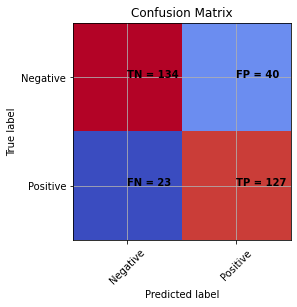


Precision Model 3 : 76.05%
Recall Model 3 : 84.67%


In [ ]:
conf_m_3 = confusion_matrix(test_predictions3, y_test)
cm_plot(conf_m_3)
accuracy_model3 = accuracy_score(test_predictions3, y_test)
precision_model3 = conf_m_3[1][1] / (conf_m_3[0][1] + conf_m_3[1][1])
recall_model3 = conf_m_3[1][1] / (conf_m_3[1][0] + conf_m_3[1][1])
print('\nPrecision Model 3 : {:.2f}%'.format(precision_model3*100))
print('Recall Model 3 : {:.2f}%'.format(recall_model3*100))

In [ ]:
accuracy_CV3 = cross_val_score(lr_cleaned_unigram_emo, train_bow3, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV3 = cross_val_score(lr_cleaned_unigram_emo, train_bow3, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV3 = cross_val_score(lr_cleaned_unigram_emo, train_bow3, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 3 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV3.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV3.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV3.mean()*100))

----- Model 3 -----
CV_accuracy: 82.23%
CV_precision: 85.45%
CV_recall: 77.15%


In [ ]:
train_predictions3 = lr_cleaned_unigram_emo.predict(train_bow3)
train_predictions3 = np.where(train_predictions3 == 'pos', 1, 0)
test_predictions3 = np.where(test_predictions3 == 'pos', 1, 0)
logLoss_CV3 = - cross_val_score(lr_cleaned_unigram_emo, train_bow3, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logLoss_3_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions3)
logLoss_3_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions3)
print('--- Log Loss (Model3) ---')
print('CV Log Loss: {:.2f}'.format(logLoss_CV3.mean()))
print('Train Log Loss: {:.2f}'.format(logLoss_3_train))
print('Test Log Loss: {:.2f}'.format(logLoss_3_test))

--- Log Loss (Model3) ---
CV Log Loss: 0.41
Train Log Loss: 1.88
Test Log Loss: 6.72


In [ ]:
X_new = X_train.reset_index(drop=True)
y_new = y_train.map({'pos':1, 'neg':0}).reset_index(drop=True)
prediction = pd.DataFrame(train_predictions3)
test1 = pd.concat([X_new, y_new, prediction], axis=1)
test1.set_axis(['text_tokens', 'sentiment','prediction'], axis=1, inplace=True)
test1
from IPython.display import display
with pd.option_context('display.max_rows', None):
    display(test1[test1['sentiment']!=test1['prediction']])

,text_tokens,sentiment,prediction
8,"ไม่,ไว,หาย",0,1
19,"มา,ขอบคุณ,เป็นไปได้",0,1
26,"หอการค้า,ดีมาก,ดี,ดี",0,1
50,"ยับ,ไม่,โดน,ไม่,มา,มา,มา,ไม่",1,0
114,"หาย,ไม่",1,0
203,,1,0
206,"ไม่,มา,ไม่",1,0
215,"งง,เคย,เจอ",0,1
220,"เจอ,งง,ไม่,มา,สักที,บ่น,ไม่,ฮือ,เป็นบุญ,😭,มา",1,0
230,ไม่,1,0


## 4th Pipeline : Cleaned + Emoji + ngram_range = (1,2) (Logistic Regression)

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=2)
df['n_grams'].values

array(['มา,หา,น่ารัก,มา หา,หา น่ารัก',
       'ปัด,ความรับผิดชอบ,เลวร้าย,ชื่อเสียง,ดี,ไม่,แย่,ไม่,ตี,ระวัง,แตก,ไม่,มา,ไม่,ปัด ความรับผิดชอบ,ความรับผิดชอบ เลวร้าย,เลวร้าย ชื่อเสียง,ชื่อเสียง ดี,ดี ไม่,ไม่ แย่,แย่ ไม่,ไม่ ตี,ตี ระวัง,ระวัง แตก,แตก ไม่,ไม่ มา,มา ไม่',
       'EMS,กรุงเทพ,หลัก,พังงา,ไม่,หลัก,🥰,EMS กรุงเทพ,กรุงเทพ หลัก,หลัก พังงา,พังงา ไม่,ไม่ หลัก,หลัก 🥰',
       ..., 'โมโห,ไม่,อี,โมโห ไม่,ไม่ อี',
       'อห,ไม่,จังหวัด,EMS,อห ไม่,ไม่ จังหวัด,จังหวัด EMS',
       'ค้าง,นครราชสีมา,กังวล,กังวล,ค้าง,รบกวน,ค้าง นครราชสีมา,นครราชสีมา กังวล,กังวล กังวล,กังวล ค้าง,ค้าง รบกวน'],
      dtype=object)

In [ ]:
X = df[['n_grams']]
y = df['sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_

{'เสียเงิน': 2503,
 'EMS': 6,
 'รับผิด': 1473,
 'เสียเงิน EMS': 2504,
 'EMS รับผิด': 23,
 'เคย': 2211,
 'มา': 1144,
 'ดีมาก': 639,
 'เหอะ': 2544,
 'เคย มา': 2235,
 'มา ดีมาก': 1173,
 'ดีมาก เหอะ': 655,
 'ชอบ': 462,
 'สามเสน': 1789,
 'ยุ่ง': 1388,
 'ไม่': 2883,
 'ชอบ สามเสน': 479,
 'สามเสน ยุ่ง': 1790,
 'ยุ่ง ไม่': 1390,
 'ไม่ มา': 2964,
 'มา มา': 1196,
 'ปรับปรุง': 960,
 'โง่': 2757,
 'รำคาญ': 1495,
 'ปรับปรุง ปรับปรุง': 963,
 'ปรับปรุง โง่': 969,
 'โง่ รำคาญ': 2759,
 '': 0,
 'โมโห': 2792,
 'อีกแล้ว': 2109,
 'อ่อนนุช': 2150,
 'เหี้ย': 2547,
 'ดอง': 554,
 'อี': 2089,
 'สัส': 1754,
 'เอม': 2585,
 'เอส': 2588,
 'รอ': 1406,
 'หี': 1994,
 'เสียเวลา': 2511,
 'อย่า': 2035,
 'หัว': 1933,
 'ควย': 298,
 'โมโห อีกแล้ว': 2798,
 'อีกแล้ว อ่อนนุช': 2119,
 'อ่อนนุช เหี้ย': 2155,
 'เหี้ย ชอบ': 2549,
 'ชอบ ดอง': 465,
 'ดอง อี': 559,
 'อี สัส': 2099,
 'สัส อี': 1755,
 'อี เอม': 2105,
 'เอม เอส': 2586,
 'เอส ไม่': 2592,
 'มา รอ': 1200,
 'รอ หี': 1427,
 'หี มา': 1995,
 'มา เสียเวลา': 1271,
 'เสียเวลา อย่า

In [ ]:
train_bow4 = cvec.transform(X_train['n_grams'])
pd.DataFrame(train_bow4.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,#ลทบ,#ลทบ รอ,(*'▽'*),E,E บั๊บเบิ้ล,EMS,EMS กระทุ่ม,EMS กรุงเทพ,EMS ชลบุรี,...,🥰 ขอบคุณ,🥰 มา,🥰 ไม่,🥰 🍋,🥰 📬,🥲,🥳,🥳 🎉,🥺,🥺 🥺
n_grams,,,,,,,,,,,,,,,,,,,,,
"เสียเงิน,EMS,รับผิด,เสียเงิน EMS,EMS รับผิด",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"เคย,มา,ดีมาก,เหอะ,เคย มา,มา ดีมาก,ดีมาก เหอะ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ชอบ,สามเสน,ยุ่ง,ไม่,มา,มา,ชอบ สามเสน,สามเสน ยุ่ง,ยุ่ง ไม่,ไม่ มา,มา มา",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ปรับปรุง,ปรับปรุง,โง่,รำคาญ,ปรับปรุง ปรับปรุง,ปรับปรุง โง่,โง่ รำคาญ",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"เคย,มา,น่ารัก,เคย มา,มา น่ารัก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ห่วยแตก,เหมือนเดิม,ems,ไม่,มา,อิด,เขต,อ่อนนุช,หู,ไม่,หี,แตด,ห่วยแตก เหมือนเดิม,เหมือนเดิม ems,ems ไม่,ไม่ มา,มา อิด,อิด เขต,เขต อ่อนนุช,อ่อนนุช หู,หู ไม่,ไม่ หี,หี แตด",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"ไม่,สะดวก,ไม่ สะดวก",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_cleaned_bigram_emo = LogisticRegression()
lr_cleaned_bigram_emo.fit(train_bow4, y_train)

LogisticRegression()

In [ ]:
test_bow4 = cvec.transform(X_test['n_grams'])
test_predictions4 = lr_cleaned_bigram_emo.predict(test_bow4)
print(classification_report(test_predictions4, y_test))

              precision    recall  f1-score   support

         neg       0.85      0.75      0.80       179
         pos       0.73      0.84      0.78       145

    accuracy                           0.79       324
   macro avg       0.79      0.79      0.79       324
weighted avg       0.80      0.79      0.79       324



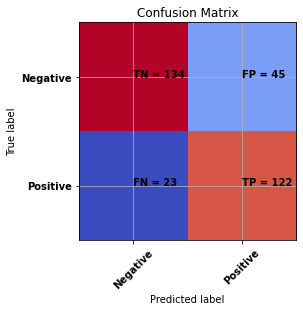


Precision Model 4 : 73.05%
Recall Model 4 : 84.14%


In [ ]:
conf_m_4 = confusion_matrix(test_predictions4, y_test)
cm_plot(conf_m_4)
accuracy_model4 = accuracy_score(test_predictions4, y_test)
precision_model4 = conf_m_4[1][1] / (conf_m_4[0][1] + conf_m_4[1][1])
recall_model4 = conf_m_4[1][1] / (conf_m_4[1][0] + conf_m_4[1][1])
print('\nPrecision Model 4 : {:.2f}%'.format(precision_model4*100))
print('Recall Model 4 : {:.2f}%'.format(recall_model4*100))

In [ ]:
accuracy_CV4 = cross_val_score(lr_cleaned_bigram_emo, train_bow4, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV4 = cross_val_score(lr_cleaned_bigram_emo, train_bow4, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV4 = cross_val_score(lr_cleaned_bigram_emo, train_bow4, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 4 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV4.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV4.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV4.mean()*100))

----- Model 4 -----
CV_accuracy: 80.24%
CV_precision: 83.50%
CV_recall: 74.73%


In [ ]:
train_predictions4 = lr_cleaned_bigram_emo.predict(train_bow4)
train_predictions4 = np.where(train_predictions4 == 'pos', 1, 0)
test_predictions4 = np.where(test_predictions4 == 'pos', 1, 0)
logLoss_CV4 = - cross_val_score(lr_cleaned_bigram_emo, train_bow4, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logLoss_4_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions4)
logLoss_4_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions4)
print('--- Log Loss (Model4) ---')
print('CV Log Loss: {:.2f}'.format(logLoss_CV4.mean()))
print('Train Log Loss: {:.2f}'.format(logLoss_4_train))
print('Test Log Loss: {:.2f}'.format(logLoss_4_test))

--- Log Loss (Model4) ---
CV Log Loss: 0.43
Train Log Loss: 0.92
Test Log Loss: 7.25


## 5th Pipeline : Cleaned + n_gram = 1 (Naive Bayes)

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens'].values

In [ ]:
def n_grams(text_tokens, n=2):
    word1 = text_tokens.split(' ')
    text_v2 = ','.join(w for w in word1)
    for i in range(n):
        if i == 0:
            continue
        for w in range(len(word1)-(i)):
            text_v = word1[w]
            for k in range(i):   
                text_v = text_v + ' ' + word1[w+k+1]
            text_v2 = text_v2 + ',' + text_v
    return text_v2

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=1)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow5 = cvec.transform(X_train['n_grams'])
test_bow5 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow5.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

In [ ]:
naive_cleaned_unigram = MultinomialNB()
naive_cleaned_unigram.fit(train_bow5, y_train)

In [ ]:
test_predictions5 = naive_cleaned_unigram.predict(test_bow5)
print(classification_report(test_predictions5, y_test))

In [ ]:
conf_m_5 = confusion_matrix(test_predictions5, y_test)
cm_plot(conf_m_5)
accuracy_model5 = accuracy_score(test_predictions5, y_test)
precision_model5 = conf_m_5[1][1] / (conf_m_5[0][1] + conf_m_5[1][1])
recall_model5 = conf_m_5[1][1] / (conf_m_5[1][0] + conf_m_5[1][1])
print('\nPrecision Model 5 : {:.2f}%'.format(precision_model5*100))
print('Recall Model 5 : {:.2f}%'.format(recall_model5*100))

In [ ]:
accuracy_CV5 = cross_val_score(naive_cleaned_unigram, train_bow5, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV5 = cross_val_score(naive_cleaned_unigram, train_bow5, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV5 = cross_val_score(naive_cleaned_unigram, train_bow5, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 5 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV5.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV5.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV5.mean()*100))

In [ ]:
train_predictions5 = naive_cleaned_unigram.predict(train_bow5)
train_predictions5 = np.where(train_predictions5 == 'pos', 1, 0)
test_predictions5 = np.where(test_predictions5 == 'pos', 1, 0)
logloss_CV5 = - cross_val_score(naive_cleaned_unigram, train_bow5, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logloss_5_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions5)
logloss_5_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions5)
print('--- MSE (Model5) ---')
print('CV log loss: {:.2f}'.format(logloss_CV5.mean()))
print('Train MSE: {:.2f}'.format(logloss_5_train))
print('Test MSE: {:.2f}'.format(logloss_5_test))

## 6th Pipeline : Cleaned + ngram_range = (1,2) (Naive Bayes)

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=2)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow6 = cvec.transform(X_train['n_grams'])
test_bow6 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow6.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

In [ ]:
naive_cleaned_bigram = MultinomialNB()
naive_cleaned_bigram.fit(train_bow6, y_train)

In [ ]:
accuracy_CV6 = cross_val_score(naive_cleaned_bigram, train_bow6, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
print('CV_accuracy Model 6 : {:.2f}%'.format(accuracy_CV6.mean()*100))

In [ ]:
test_predictions6 = naive_cleaned_bigram.predict(test_bow6)
print(classification_report(test_predictions6, y_test))

In [ ]:
conf_m_6 = confusion_matrix(test_predictions6, y_test)
cm_plot(conf_m_6)
accuracy_model6 = accuracy_score(test_predictions6, y_test)
precision_model6 = conf_m_6[1][1] / (conf_m_6[0][1] + conf_m_6[1][1])
recall_model6 = conf_m_6[1][1] / (conf_m_6[1][0] + conf_m_6[1][1])
print('\nPrecision Model 6 : {:.2f}%'.format(precision_model6*100))
print('Recall Model 6 : {:.2f}%'.format(recall_model6*100))

In [ ]:
accuracy_CV6 = cross_val_score(naive_cleaned_bigram, train_bow6, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV6 = cross_val_score(naive_cleaned_bigram, train_bow6, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV6 = cross_val_score(naive_cleaned_bigram, train_bow6, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 6 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV6.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV6.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV6.mean()*100))

In [ ]:
train_predictions6 = naive_cleaned_bigram.predict(train_bow6)
train_predictions6 = np.where(train_predictions6 == 'pos', 1, 0)
test_predictions6 = np.where(test_predictions6 == 'pos', 1, 0)

In [ ]:
train_predictions6 = naive_cleaned_bigram.predict(train_bow6)
train_predictions6 = np.where(train_predictions6 == 'pos', 1, 0)
test_predictions6 = np.where(test_predictions6 == 'pos', 1, 0)
logloss_CV6 = - cross_val_score(naive_cleaned_bigram, train_bow6, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logloss_6_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions6)
logloss_6_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions6)
print('--- Log Loss (Model6) ---')
print('CV log loss: {:.2f}'.format(logloss_CV6.mean()))
print('Train log loss: {:.2f}'.format(logloss_6_train))
print('Test log loss: {:.2f}'.format(logloss_6_test))

## 7th Pipeline : Cleaned + Emoji + ngram_range = 1 (Naive Bayes)

In [ ]:
emoji_english = emoji.UNICODE_EMOJI['en']
emoji_list = [key for key in emoji_english.keys()]

custom_words_list = set(thai_words())

custom_words_list.update(emoji_list)

custom_tokenizer = Tokenizer(custom_dict=custom_words_list, engine='newmm')

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens']

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=1)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train_t, X_train_v, y_train_t, y_train_v = train_test_split(X_train, y_train, test_size=0.3, random_state=101)

### v

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train_t['n_grams'])
cvec.vocabulary_
train_bow7 = cvec.transform(X_train_t['n_grams'])
test_bow7 = cvec.transform(X_train_v['n_grams'])
pd.DataFrame(train_bow7.toarray(), columns=cvec.get_feature_names(), index=X_train_t['n_grams'])

In [ ]:
naive_cleaned_emo_unigram = MultinomialNB()
naive_cleaned_emo_unigram.fit(train_bow7, y_train_t)

In [ ]:
test_predictions7 = naive_cleaned_emo_unigram.predict(test_bow7)
print(classification_report(test_predictions7, y_train_v))

In [ ]:
test_predictions7 = np.where(test_predictions7 == 'pos', 1, 0)
X_new = X_train_v.reset_index(drop=True)
y_new = y_train_v.map({'pos':1, 'neg':0}).reset_index(drop=True)
prediction = pd.DataFrame(test_predictions7)
test1 = pd.concat([X_new, y_new, prediction], axis=1)
test1.set_axis(['text_tokens', 'sentiment','prediction'], axis=1, inplace=True)
test1
from IPython.display import display
with pd.option_context('display.max_rows', None):
    display(test1[test1['sentiment']!=test1['prediction']])

### ppp

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow7 = cvec.transform(X_train['n_grams'])
test_bow7 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow7.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

In [ ]:
naive_cleaned_emo_unigram = MultinomialNB()
naive_cleaned_emo_unigram.fit(train_bow7, y_train)

In [ ]:
test_predictions7 = naive_cleaned_emo_unigram.predict(test_bow7)
print(classification_report(test_predictions7, y_test))

In [ ]:
conf_m_7 = confusion_matrix(test_predictions7, y_test)
cm_plot(conf_m_7)
accuracy_model7 = accuracy_score(test_predictions7, y_test)
precision_model7 = conf_m_7[1][1] / (conf_m_7[0][1] + conf_m_7[1][1])
recall_model7 = conf_m_7[1][1] / (conf_m_7[1][0] + conf_m_7[1][1])
print('\nPrecision Model 7 : {:.2f}%'.format(precision_model7*100))
print('Recall Model 7 : {:.2f}%'.format(recall_model7*100))

In [ ]:
accuracy_CV7 = cross_val_score(naive_cleaned_emo_unigram, train_bow7, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV7 = cross_val_score(naive_cleaned_emo_unigram, train_bow7, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV7 = cross_val_score(naive_cleaned_emo_unigram, train_bow7, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 7 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV7.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV7.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV7.mean()*100))

In [ ]:
train_predictions7 = naive_cleaned_emo_unigram.predict(train_bow7)
train_predictions7 = np.where(train_predictions7 == 'pos', 1, 0)
test_predictions7 = np.where(test_predictions7 == 'pos', 1, 0)

In [ ]:
logloss_CV7 = - cross_val_score(naive_cleaned_emo_unigram, train_bow7, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logloss_7_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions7)
logloss_7_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions7)
print('--- Log Loss (Model7) ---')
print('CV log loss: {:.2f}'.format(logloss_CV7.mean()))
print('Train log loss: {:.2f}'.format(logloss_7_train))
print('Test log loss: {:.2f}'.format(logloss_7_test))

In [ ]:
X_new = X_train.reset_index(drop=True)
y_new = y_train.map({'pos':1, 'neg':0}).reset_index(drop=True)
prediction = pd.DataFrame(train_predictions7)
test1 = pd.concat([X_new, y_new, prediction], axis=1)
test1.set_axis(['text_tokens', 'sentiment','prediction'], axis=1, inplace=True)
test1
from IPython.display import display
with pd.option_context('display.max_rows', None):
    display(test1[test1['sentiment']!=test1['prediction']])

## 8th Pipeline : Cleaned + Emoji + ngram_range = (1,2) (Naive Bayes)

In [ ]:
emoji_english = emoji.UNICODE_EMOJI['en']
emoji_list = [key for key in emoji_english.keys()]

custom_words_list = set(thai_words())

custom_words_list.update(emoji_list)

custom_tokenizer = Tokenizer(custom_dict=custom_words_list, engine='newmm')

In [ ]:
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = custom_tokenizer.word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens']

In [ ]:
df['n_grams'] = df['text_tokens'].apply(n_grams, n=2)
df['n_grams'].values
X = df[['n_grams']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
cvec.fit_transform(X_train['n_grams'])
cvec.vocabulary_
train_bow8 = cvec.transform(X_train['n_grams'])
test_bow8 = cvec.transform(X_test['n_grams'])
pd.DataFrame(train_bow8.toarray(), columns=cvec.get_feature_names(), index=X_train['n_grams'])

In [ ]:
from sklearn.linear_model import LogisticRegression
naive_cleaned_emo_bigram = MultinomialNB()
naive_cleaned_emo_bigram.fit(train_bow8, y_train)

In [ ]:
test_predictions8 = naive_cleaned_emo_bigram.predict(test_bow8)
print(classification_report(test_predictions8, y_test))

In [ ]:
conf_m_8 = confusion_matrix(test_predictions8, y_test)
cm_plot(conf_m_8)
accuracy_model8 = accuracy_score(test_predictions8, y_test)
precision_model8 = conf_m_8[1][1] / (conf_m_8[0][1] + conf_m_8[1][1])
recall_model8 = conf_m_8[1][1] / (conf_m_8[1][0] + conf_m_8[1][1])
print('\nPrecision Model 8 : {:.2f}%'.format(precision_model8*100))
print('Recall Model 8 : {:.2f}%'.format(recall_model8*100))

In [ ]:
accuracy_CV8 = cross_val_score(naive_cleaned_emo_bigram, train_bow8, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='accuracy')
recall_CV8 = cross_val_score(naive_cleaned_emo_bigram, train_bow8, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='recall')
precision_CV8 = cross_val_score(naive_cleaned_emo_bigram, train_bow8, y_train.map({'pos':1, 'neg':0}), cv=3, scoring='precision')
print('----- Model 8 -----')
print('CV_accuracy: {:.2f}%'.format(accuracy_CV8.mean()*100))
print('CV_precision: {:.2f}%'.format(precision_CV8.mean()*100))
print('CV_recall: {:.2f}%'.format(recall_CV8.mean()*100))

In [ ]:
train_predictions8 = naive_cleaned_emo_bigram.predict(train_bow8)
train_predictions8 = np.where(train_predictions8 == 'pos', 1, 0)
test_predictions8 = np.where(test_predictions8 == 'pos', 1, 0)

In [ ]:
logloss_CV8 = - cross_val_score(naive_cleaned_emo_bigram, train_bow8, y_train.map({'pos':1, 'neg':0}), cv=5, scoring='neg_log_loss')
logloss_8_train = log_loss(y_train.map({'pos':1, 'neg':0}), train_predictions8)
logloss_8_test = log_loss(y_test.map({'pos':1, 'neg':0}), test_predictions8)
print('--- Log Loss (Model8) ---')
print('CV log loss: {:.2f}'.format(logloss_CV8.mean()))
print('Train log loss: {:.2f}'.format(logloss_8_train))
print('Test log loss: {:.2f}'.format(logloss_8_test))

# **Model Comparison**

## ROC

In [ ]:
from sklearn.metrics import roc_curve
y_pred_prob1 = lr_cleaned_unigram.predict_proba(test_bow1)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob1)
auc1 = roc_auc_score(y_test, y_pred_prob1)

y_pred_prob2 = lr_cleaned_bigram.predict_proba(test_bow2)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob2)
auc2 = roc_auc_score(y_test, y_pred_prob2)

y_pred_prob3 = lr_cleaned_unigram_emo.predict_proba(test_bow3)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob3)
auc3 = roc_auc_score(y_test, y_pred_prob3)

y_pred_prob4 = lr_cleaned_bigram_emo.predict_proba(test_bow4)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob4)
auc4 = roc_auc_score(y_test, y_pred_prob4)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= 'LR (Cleaned, ngram_range = 1)')
plt.plot(fpr2, tpr2, label= 'LR (Cleaned, ngram_range = (1,2))')
plt.plot(fpr3, tpr3, label= 'LR (Cleaned, ngram_range = 1, emoji)')
plt.plot(fpr4, tpr4, label= 'LR (Cleaned, ngram_range = (1,2), emoji)')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [ ]:
y_pred_prob5 = naive_cleaned_unigram.predict_proba(test_bow5)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob5)
auc5 = roc_auc_score(y_test, y_pred_prob5)

y_pred_prob6 = naive_cleaned_bigram.predict_proba(test_bow6)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob6)
auc6 = roc_auc_score(y_test, y_pred_prob6)

y_pred_prob7 = naive_cleaned_emo_unigram.predict_proba(test_bow7)[:,1]
fpr7 , tpr7, thresholds7 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob7)
auc7 = roc_auc_score(y_test, y_pred_prob7)

y_pred_prob8 = naive_cleaned_emo_bigram.predict_proba(test_bow8)[:,1]
fpr8 , tpr8, thresholds8 = roc_curve(y_test.map({'pos':1, 'neg':0}), y_pred_prob8)
auc8 = roc_auc_score(y_test, y_pred_prob8)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr5, tpr5, label= 'NB (Cleaned, ngram_range = 1)')
plt.plot(fpr6, tpr6, label= 'NB (Cleaned, ngram_range = (1,2))')
plt.plot(fpr7, tpr7, label= 'NB (Cleaned, ngram_range = 1, emoji)')
plt.plot(fpr8, tpr8, label= 'NB (Cleaned, ngram_range = (1,2), emoji)')
plt.legend()
plt.title("Naive Bayes Model Comparison")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

## accuracy, precision, recall, CV

In [ ]:
metrics_LR_list = {'Model': ['1', '2', '3', '4'], 'accuracy': [accuracy_model1, accuracy_model2, accuracy_model3, accuracy_model4], \
                   'precision': [precision_model1, precision_model2, precision_model3, precision_model4], \
                   'recall': [recall_model1, recall_model2, recall_model3, recall_model4], \
                   'accuracy_CV': [accuracy_CV1.mean(), accuracy_CV2.mean(), accuracy_CV3.mean(), accuracy_CV4.mean()], \
                   'precision_CV': [precision_CV1.mean(), precision_CV2.mean(), precision_CV3.mean(), precision_CV4.mean()], \
                   'recall_CV': [recall_CV1.mean(), recall_CV2.mean(), recall_CV3.mean(), recall_CV4.mean()]}
metrics_LR_df = pd.DataFrame(data=metrics_LR_list)
metrics_DB_list = {'Model': ['1', '2', '3', '4'], 'accuracy': [accuracy_model5, accuracy_model6, accuracy_model7, accuracy_model8], \
                   'precision': [precision_model5, precision_model6, precision_model7, precision_model8], \
                   'recall': [recall_model5, recall_model6, recall_model7, recall_model8], \
                   'accuracy_CV': [accuracy_CV5.mean(), accuracy_CV6.mean(), accuracy_CV7.mean(), accuracy_CV8.mean()], \
                   'precision_CV': [precision_CV5.mean(), precision_CV6.mean(), precision_CV7.mean(), precision_CV8.mean()], \
                   'recall_CV': [recall_CV5.mean(), recall_CV6.mean(), recall_CV7.mean(), recall_CV8.mean()]}
metrics_NB_df = pd.DataFrame(data=metrics_DB_list)

In [ ]:
compare_list = {'Model': ['Rule-Based', 'Logistic Regression', 'Naive Bayes Classifier'], 'accuracy': [accuracy_model0, accuracy_model3, accuracy_model7], \
                'precision': [precision_model0, precision_model3, precision_model7], \
                'recall': [recall_model0, recall_model3, recall_model7], \
                'accuracy_CV': [accuracy_model0, accuracy_CV3, accuracy_CV3],\
                'accuracy_CV': [accuracy_model0, accuracy_model3, accuracy_model7],\
                'accuracy_CV': [accuracy_model0, accuracy_model3, accuracy_model7]}
compare_df = pd.DataFrame(data=compare_list)                

In [ ]:
sns.set_style('whitegrid')


ax = sns.barplot(x=compare_df['Model'],
            y=compare_df['recall'],
            ci=None, palette='autumn')

ax.set(xlabel='Model',
      ylabel='recall',
      title='Recall')

plt.xticks(rotation=50)
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15,6))

sns.barplot(x=compare_df['Model'],
            y=compare_df['accuracy'],
            ci=None, palette='autumn',
            ax=axes[0])

axes[0].set(xlabel='Model',
      ylabel='accuracy',
      title='Accuracy')

sns.barplot(x=compare_df['Model'],
            y=compare_df['precision'],
            ci=None, palette='autumn',
            ax=axes[1])

axes[1].set(xlabel='Model',
      ylabel='pecision',
      title='Precision')

sns.barplot(x=compare_df['Model'],
            y=compare_df['recall'],
            ci=None, palette='autumn',
            ax=axes[2])

axes[2].set(xlabel='Model',
      ylabel='accuracy',
      title='Recall')

plt.xticks(rotation=50)
plt.show()

In [ ]:
#accuracy

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(16,12))

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['accuracy'],
            ci=None,
            ax=axes[0,0])

axes[0,0].set(xlabel='Model',
      ylabel='accuracy',
      title='accuracy (Logistic Regression)')

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['accuracy_CV'],
            ci=None,
            ax=axes[1,0])

axes[1,0].set(xlabel='Model',
      ylabel='accuracy',
      title='accuracy_CV (k=3) (Logistic Regression)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['accuracy'],
            ci=None,
            ax=axes[0,1])

axes[0,1].set(xlabel='Model',
      ylabel='accuracy',
      title='accuracy (Naive Bayes)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['accuracy_CV'],
            ci=None,
            ax=axes[1,1])

axes[1,1].set(xlabel='Model',
      ylabel='accuracy_CV',
      title='accuracy_CV (k=3) (Naive Bayes)')

for index, row in metrics_LR_df.iterrows():
    axes[0,0].text(row.name,row.accuracy, round(row.accuracy,3), ha="center")

for index, row in metrics_LR_df.iterrows():
    axes[1,0].text(row.name,row.accuracy_CV, round(row.accuracy_CV,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[0,1].text(row.name,row.accuracy, round(row.accuracy,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[1,1].text(row.name,row.accuracy_CV, round(row.accuracy_CV,3), ha="center")

plt.show()

In [ ]:
#precision

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(16,12))

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['precision'],
            ci=None,
            ax=axes[0,0])

axes[0,0].set(xlabel='Model',
      ylabel='precision',
      title='precision (Logistic Regression)')

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['precision_CV'],
            ci=None,
            ax=axes[1,0])

axes[1,0].set(xlabel='Model',
      ylabel='precision',
      title='precision_CV (k=3) (Logistic Regression)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['precision'],
            ci=None,
            ax=axes[0,1])

axes[0,1].set(xlabel='Model',
      ylabel='precision',
      title='precision (Naive Bayes)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['precision_CV'],
            ci=None,
            ax=axes[1,1])

axes[1,1].set(xlabel='Model',
      ylabel='precision_CV',
      title='precision_CV (k=3) (Naive Bayes)')

for index, row in metrics_LR_df.iterrows():
    axes[0,0].text(row.name,row.precision, round(row.precision,3), ha="center")

for index, row in metrics_LR_df.iterrows():
    axes[1,0].text(row.name,row.precision_CV, round(row.precision_CV,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[0,1].text(row.name,row.precision, round(row.precision,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[1,1].text(row.name,row.precision_CV, round(row.precision_CV,3), ha="center")

plt.show()

In [ ]:
#recall

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(16,12))

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['recall'],
            ci=None,
            ax=axes[0,0])

axes[0,0].set(xlabel='Model',
      ylabel='recall',
      title='recall (Logistic Regression)')

sns.barplot(x=metrics_LR_df['Model'],
            y=metrics_LR_df['recall_CV'],
            ci=None,
            ax=axes[1,0])

axes[1,0].set(xlabel='Model',
      ylabel='recall',
      title='recall_CV (k=3) (Logistic Regression)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['recall'],
            ci=None,
            ax=axes[0,1])

axes[0,1].set(xlabel='Model',
      ylabel='recall',
      title='recall (Naive Bayes)')

sns.barplot(x=metrics_NB_df['Model'],
            y=metrics_NB_df['recall_CV'],
            ci=None,
            ax=axes[1,1])

axes[1,1].set(xlabel='Model',
      ylabel='recall_CV',
      title='recall_CV (k=3) (Naive Bayes)')

for index, row in metrics_LR_df.iterrows():
    axes[0,0].text(row.name,row.recall, round(row.recall,3), ha="center")

for index, row in metrics_LR_df.iterrows():
    axes[1,0].text(row.name,row.recall_CV, round(row.recall_CV,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[0,1].text(row.name,row.recall, round(row.recall,3), ha="center")

for index, row in metrics_NB_df.iterrows():
    axes[1,1].text(row.name,row.recall_CV, round(row.recall_CV,3), ha="center")

plt.show()

In [ ]:
roc_auc_list_LR = {'Model': ['1', '2', '3', '4'], 'auc_roc_score': [auc5, auc6, auc7, auc8]}
roc_auc_df_LR = pd.DataFrame(data=auc_roc_score_list_LR)
roc_auc_list_NB = {'Model': ['1', '2', '3', '4'], 'auc_roc_score': [auc1, auc2, auc3, auc4]}
roc_auc_df_NB = pd.DataFrame(data=auc_roc_score_list_NB)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

sns.barplot(x=roc_auc_df_LR['Model'],
            y=roc_auc_df_LR['auc_roc_score'],
            ci=None,
            ax=ax0,
            palette='crest')

ax0.set(xlabel='Model',
      ylabel='ROC_AUC',
      title='ROC AUC (Logistic Regression)',
      ylim=(0,1),
      )

sns.barplot(x=roc_auc_df_NB['Model'],
            y=roc_auc_df_NB['auc_roc_score'],
            ci=None,
            ax=ax1,
            palette='Blues')

ax1.set(xlabel='Model',
      ylabel='ROC_AUC',
      title='ROC AUC (Naive Bayes)'
      )

for index, row in roc_auc_df_LR.iterrows():
    ax0.text(row.name,row.auc_roc_score, round(row.auc_roc_score,3), ha="center")

for index, row in roc_auc_df_NB.iterrows():
    ax1.text(row.name,row.auc_roc_score, round(row.auc_roc_score,3), ha="center")

plt.show()

## Error

In [ ]:
LR_error_list = {'Model': ['Before using n_grams = 2', 'After using n_grams = 2'], 'Train': [logLoss_3_train, logLoss_4_train], \
                 'Test': [logLoss_3_test, logLoss_4_test], \
                 'CV': [logLoss_CV3.mean(), logLoss_CV4.mean()]}
LR_error_df = pd.DataFrame(data=LR_error_list)

In [ ]:
NB_error_list = {'Model': ['1', '2', '3', '4'], 'Train': [logloss_5_train, logloss_6_train, logloss_7_train, logloss_8_train], 'Test': [logloss_5_test, logloss_6_test, logloss_7_test, logloss_8_test],
                 'CV': [logloss_CV5.mean(), logloss_CV6.mean(), logloss_CV7.mean(), logloss_CV8.mean()]}
NB_error_df = pd.DataFrame(data=NB_error_list)

In [ ]:
logLoss_CV1.mean()

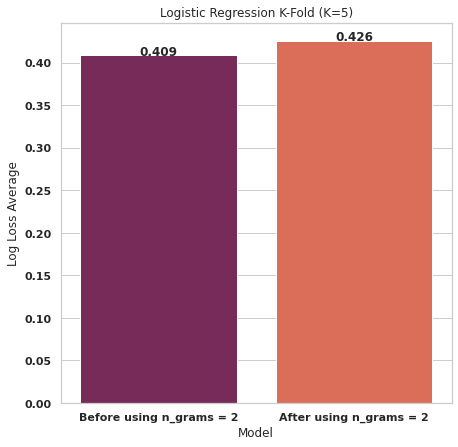

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("whitegrid")

ax = sns.barplot(x=LR_error_df['Model'],
            y=LR_error_df['CV'],
            ci=None,
            palette='rocket')

ax.set(xlabel='Model',
       ylabel='Log Loss Average',
      title='Logistic Regression K-Fold (K=5)')

for index, row in LR_error_df.iterrows():
    ax.text(row.name,row.CV, round(row.CV,3), ha="center")

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("whitegrid")

ax = sns.barplot(x=NB_error_df['Model'],
            y=NB_error_df['CV'],
            ci=None,
            palette='rocket')

ax.set(xlabel='Model',
       ylabel='MSE Average',
      title='Naive Bayes Classifer with K-Fold CV (K=5)')

for index, row in NB_error_df.iterrows():
    ax.text(row.name,row.CV, round(row.CV,3), ha="center")

plt.show()

In [ ]:
sns.set_style('whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

sns.barplot(x=LR_error_df['Model'],
            y=LR_error_df['Train'],
            ci=None,
            palette='rocket',
            ax=ax0)

ax0.set(xlabel='Model',
      ylabel='Log Loss',
      title='Error on Training Set')

sns.barplot(x=LR_error_df['Model'],
            y=LR_error_df['Test'],
            ci=None,
            ax=ax1,
            palette='rocket',
            )

ax1.set(xlabel='Model',
      ylabel='Log Loss',
      title='Error on Test Set',
      ylim=(0,8))

for index, row in LR_error_df.iterrows():
    ax0.text(row.name,row.Train, round(row.Train,3), ha="center")

for index, row in LR_error_df.iterrows():
    ax1.text(row.name,row.Test, round(row.Test,3), ha="center")

plt.show()

In [ ]:
sns.set_style('whitegrid')

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

sns.barplot(x=NB_error_df['Model'],
            y=NB_error_df['Train'],
            ci=None,
            ax=ax0,
            palette='magma')

ax0.set(xlabel='Model',
      ylabel='MSE',
      title='Error on Training Set')

sns.barplot(x=NB_error_list['Model'],
            y=NB_error_list['Test'],
            ci=None,
            palette='magma',
            ax=ax1)

ax1.set(xlabel='Model',
      ylabel='MSE',
      title='Error on Test Set',
      ylim=(0,0.21))

for index, row in NB_error_df.iterrows():
    ax0.text(row.name,row.Train, round(row.Train,3), ha="center")

for index, row in NB_error_df.iterrows():
    ax1.text(row.name,row.Test, round(row.Test,3), ha="center")

plt.show()

In [ ]:
LR_error_CV_list = {'Model': ['1', '2', '3', '4'], 'Train': [logLoss_1_train, logLoss_2_train, logLoss_3_train, logLoss_4_train], 'Test': [logLoss_1_test, logLoss_2_test, logLoss_3_test, logLoss_4_test]}
LR_error_CV_df = pd.DataFrame(data=LR_error_list)
NB_error_CV_list = {'Model': ['1', '2', '3', '4'], 'Train': [MSE_5_train, MSE_6_train, MSE_7_train, MSE_8_train], 'Test': [MSE_5_test, MSE_6_test, MSE_7_test, MSE_8_test]}
NB_error_CV_df = pd.DataFrame(data=NB_error_list)